# [Perceval](https://perceval.quandela.net/docs/)

https://perceval.quandela.net/docs/algorithms.html

Perceval est la plateforme logicielle de Quandela, permettant le développement de circuit et algorithme sur ordinateur photonique.

## Bell state

En informatique photonique, le protocole KLM permet de réaliser des portes CNOT. Perceval propose plusieurs méthodes pour réaliser une CNOT. Nous allons ici construire des états de Bell avec différents méthodes et comparer l'amplitude de probabilité sortante.

In [1]:
import math
import perceval as pcvl
import pandas as pd
source = pcvl.Source(emission_probability=0.40, multiphoton_component=0.01)

### Ralph CNOT

In [2]:
post = pcvl.catalog['postprocessed cnot'].build_processor()

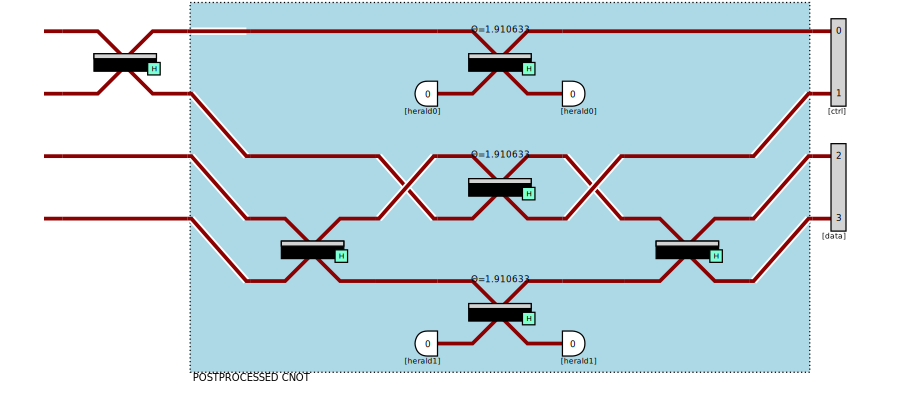

In [3]:
QPU = pcvl.Processor("SLOS", 4, source)
QPU.add(0, pcvl.BS.H())
QPU.add(0, post)

pcvl.pdisplay(QPU, recursive=True)

In [4]:
QPU.with_input(pcvl.BasicState([1, 0, 1, 0]))

In [5]:
output_post=QPU.probs()["results"]
pcvl.pdisplay(output_post, max_v=10)

state,probability
"|1,0,1,0>",0.495518
"|0,1,0,1>",0.495518
"|0,1,1,0>",0.00747
"|1,0,0,1>",0.001494


### Heralded CNOT

In [6]:
heralder = pcvl.catalog['heralded cnot'].build_processor()

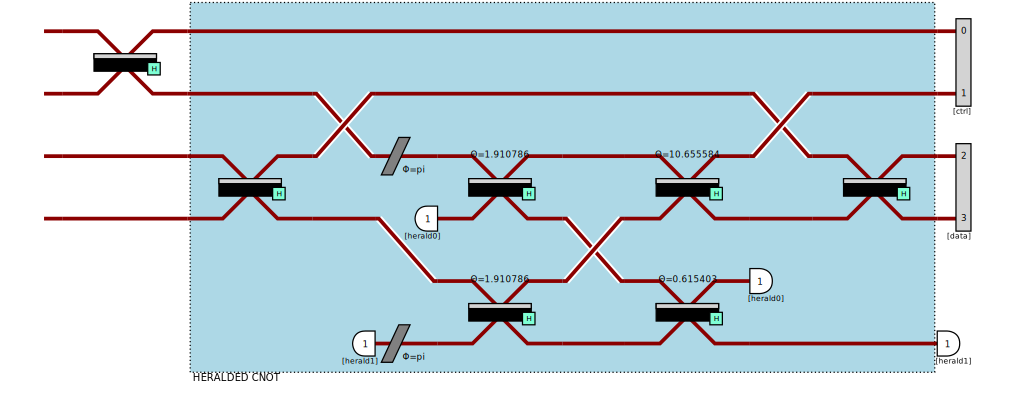

In [7]:
QPU = pcvl.Processor("SLOS", 4, source)
QPU.add(0, pcvl.BS.H())
QPU.add(0, heralder)

pcvl.pdisplay(QPU, recursive=True)

In [8]:
QPU.with_input(pcvl.BasicState([1, 0, 1, 0]))

In [9]:
output_heralder=QPU.probs()["results"]
pcvl.pdisplay(output_heralder, max_v=10)

state,probability
"|0,1,0,1>",0.478995
"|1,0,1,0>",0.475693
"|1,1,0,0>",0.006645
"|1,0,0,1>",0.006644
"|0,1,1,0>",0.004687
"|0,0,1,1>",0.004687
"|0,2,0,0>",0.004034
"|0,0,0,2>",0.004032
"|0,0,2,0>",0.003725
"|2,0,0,0>",0.00178


### KLM CNOT

In [10]:
klm = pcvl.catalog['klm cnot'].build_processor()

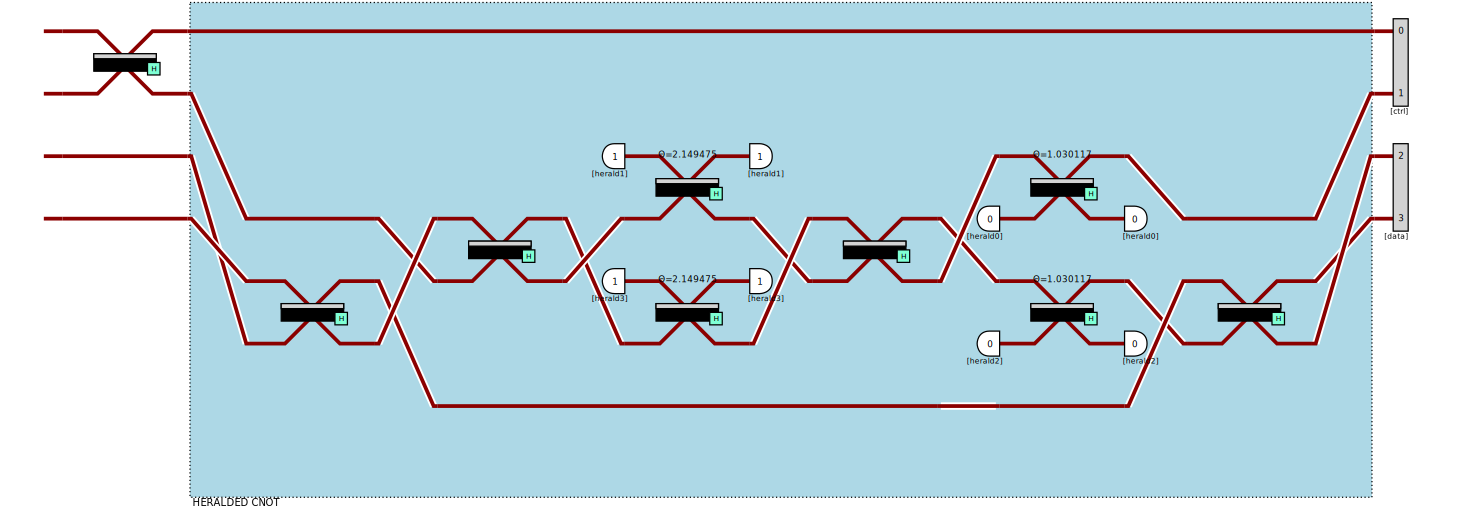

In [11]:
QPU = pcvl.Processor("SLOS", 4, source)
QPU.add(0, pcvl.BS.H())
QPU.add(0, klm)

pcvl.pdisplay(QPU, recursive=True)

In [12]:
QPU.with_input(pcvl.BasicState([1, 0, 1, 0]))

In [13]:
output_klm=QPU.probs()["results"]
pcvl.pdisplay(output_klm, max_v=10)

state,probability
"|1,0,1,0>",0.477572
"|0,1,0,1>",0.47747
"|1,1,0,0>",0.007514
"|1,0,0,1>",0.005569
"|0,0,0,2>",0.005508
"|0,0,1,1>",0.004554
"|0,2,0,0>",0.004019
"|0,1,1,0>",0.003715
"|0,0,2,0>",0.003406
"|2,0,0,0>",0.001935


### Comparaison

In [14]:
compare = pd.DataFrame([output_post, output_heralder, output_klm], index=['post', 'heralder', 'klm']).T
# transform nan to 0
compare = compare.fillna(0)

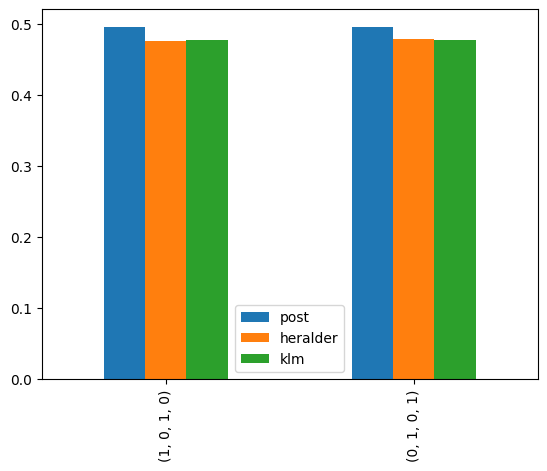

In [15]:
import matplotlib.pyplot as plt

# plot only the first 2 elements
compare.iloc[:2].plot(kind='bar');

In [16]:
compare

,post,heralder,klm
"(1, 0, 1, 0)",0.495518,0.475693,0.477572
"(0, 1, 0, 1)",0.495518,0.478995,0.477470
"(0, 1, 1, 0)",0.007470,0.004687,0.003715
"(1, 0, 0, 1)",0.001494,0.006644,0.005569
"(1, 1, 0, 0)",0.000000,0.006645,0.007514
"(0, 2, 0, 0)",0.000000,0.004034,0.004019
"(0, 0, 2, 0)",0.000000,0.003725,0.003406
"(0, 0, 1, 1)",0.000000,0.004687,0.004554
"(0, 0, 0, 2)",0.000000,0.004032,0.005508
"(2, 0, 0, 0)",0.000000,0.001780,0.001935


On observe une plus grande amplitude de probabilité pour la porte heradled et KLM que pour Ralph. Meilleure précision pour Ralph